In [20]:
# importing useful libs on the go
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.grid_search import RandomizedSearchCV
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.cross_validation import KFold
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold
from sklearn import cross_validation
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import collections

plt.style.use('fivethirtyeight') # Good looking plots
pd.set_option('display.max_columns', None) # Display any number of columns

% matplotlib inline

In [2]:
from matplotlib.cm import register_cmap

In [3]:
train = pd.read_csv('train_modi2.csv')

In [4]:
test = pd.read_csv('test_modi2.csv')

In [5]:
train['ACT_TYPE'].dtype

dtype('int64')

In [6]:
train.columns.to_series().groupby(train.dtypes).groups

{dtype('int64'): Index([u'ACT_TYPE', u'GENDER', u'LEGAL_ENTITY', u'AGE', u'CC_HOLD',
        u'CC_ACTIVE', u'DC_HOLD', u'DC_ACTIVE', u'COC_ELIGIBLE',
        u'EOP_BAL_MON_01', u'FINANCE_MON_01', u'JOBS_MON_01',
        u'LIFESTYLE_MON_01', u'INMON_01KET_MON_01', u'TRAVEL_MON_01',
        u'CHANNEL_CLICK_DISP', u'DESIGNATION_FINAL', u'TOP9_CITY',
        u'PL2CC_ELIGIBLE', u'PA_PQ_TAG', u'NEFT_CC_CATEGORY',
        u'NEFT_DC_CATEGORY', u'TPT_DC_CATEGORY_MON_01',
        u'TPT_CC_CATEGORY_MON_01', u'IMPS_CC_CATEGORY_MON_01', u'CLOSED_DATE',
        u'TOP_100_CORP', u'TOP_800_CORP', u'TOP_CORP_TAG', u'CREDIT_ACT',
        u'DEBIT_ACT', u'RESPONDERS', u'TAG', u'CCHOLD', u'CCACTIVE',
        u'DCACTIVE', u'DC_SPEND', u'CC_SPEND', u'MATURITY', u'L_ACTIVE',
        u'TOP10_14_CITY', u'INQ', u'TAG2'],
       dtype='object'),
 dtype('float64'): Index([u'PM_FD_MON_01', u'CR_LIMIT', u'C_COUNT_L3_MON_06',
        u'D_COUNT_L3_MON_06', u'C_COUNT_L3_MON_05', u'D_COUNT_L3_MON_05',
        u'C_COUNT_

In [7]:
train['RESPONDERS'].value_counts()

0    295388
1      4612
Name: RESPONDERS, dtype: int64

In [5]:
X_train = train.drop(['RESPONDERS'], axis=1, inplace=False)
y_train = train['RESPONDERS']
Xtrain_std = StandardScaler().fit_transform(X_train)

In [6]:
y_std = LabelEncoder().fit_transform(y_train)

In [7]:
Xtest_std = StandardScaler().fit_transform(test)

In [10]:
mean_vec = np.mean(Xtrain_std, axis=0)
cov_mat = (Xtrain_std - mean_vec).T.dot((Xtrain_std - mean_vec)) / (Xtrain_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00000333  0.08708257  0.02085677 ..., -0.00427636 -0.01730842
   0.03220846]
 [ 0.08708257  1.00000333  0.03884103 ..., -0.02797137 -0.01822406
  -0.02689728]
 [ 0.02085677  0.03884103  1.00000333 ..., -0.00204195 -0.00224823
   0.00154239]
 ..., 
 [-0.00427636 -0.02797137 -0.00204195 ...,  1.00000333  0.01402502
   0.02948647]
 [-0.01730842 -0.01822406 -0.00224823 ...,  0.01402502  1.00000333
   0.01053406]
 [ 0.03220846 -0.02689728  0.00154239 ...,  0.02948647  0.01053406
   1.00000333]]


In [11]:
cov_mat = np.cov(Xtrain_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[  5.50041262e-02   5.94346823e-02   1.93396631e-02 ...,   4.91956120e-03
    2.52828290e-03  -3.93167841e-05]
 [  2.41051322e-02  -3.14684628e-02   8.75089821e-03 ...,   7.80988752e-02
    6.07990205e-02   1.14657674e-01]
 [  2.80035037e-03  -7.32930779e-04   2.42007550e-03 ...,   5.45036515e-03
   -4.45073469e-02  -4.79188492e-02]
 ..., 
 [ -1.94509257e-02   2.08001491e-02  -6.15076252e-03 ...,  -4.64959677e-02
    9.49352260e-02   2.80684296e-02]
 [ -2.52392629e-02   6.39263552e-03  -8.57900604e-03 ...,  -1.09715276e-01
   -9.48112756e-02  -7.51500696e-02]
 [ -2.51713366e-02   3.45089142e-02   5.63139314e-03 ...,   6.42392851e-03
   -1.80442420e-02  -4.38432261e-02]]

Eigenvalues 
[  1.78901908e+01   5.56307023e+00   4.37587379e+00   3.24899395e+00
   2.57953140e+00   2.22593870e+00   2.10968990e+00   1.91042896e+00
   1.69848565e+00   1.61882476e+00   1.50007905e+00   1.44365726e+00
   1.35290675e+00   1.70379406e-02   9.99914777e-04   4.81841099e-02
   5.21484108e-0

In [12]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
17.8901907579
5.56307023153
4.3758737852
3.24899395331
2.57953140013
2.22593869743
2.10968989506
1.91042896185
1.69848564749
1.61882475696
1.50007904847
1.44365725688
1.35290675375
0.0170379405913
0.000999914777007
0.0481841099209
0.0521484108288
0.07401000408
0.0786349997577
0.0938609864591
6.78787620237e-15
1.32793799023
0.102364658396
0.117011092134
0.131718245447
0.149428577919
0.153837536452
0.17672187793
0.191775367319
0.203575584294
0.219033855924
0.226247985905
0.241170627201
1.23594370708
1.22485729879
0.26749391123
0.268038822997
0.290280297937
0.317808588897
0.307501958938
1.2094601802
0.347278733139
0.373295990664
0.400705455951
0.356257160895
0.352656133451
0.366676533818
0.420321540517
1.18416512237
0.480028967184
0.446796205017
0.451182247878
0.501146788385
0.506195198847
1.13266454419
0.565657641074
0.525028117682
0.551752979776
0.543772694209
0.535863455185
0.531283334342
0.607099145725
0.594161490942
1.10343387599
0.648036101627
0.6330

In [13]:
pca = PCA(n_components=15)
pca.fit_transform(X_train)
print pca.explained_variance_ratio_

[  5.78859204e-01   3.84546539e-01   1.64995900e-02   9.24675029e-03
   2.41732575e-03   2.32834962e-03   2.21338176e-03   8.85479112e-04
   7.48396863e-04   4.65198702e-04   2.74117940e-04   2.53895956e-04
   2.33148276e-04   2.05356575e-04   1.55718216e-04]


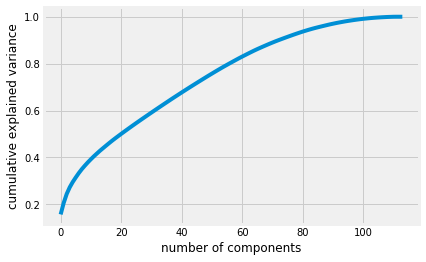

In [14]:
#Explained variance
pca = PCA().fit(Xtrain_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [9]:
pca = PCA(n_components=80)

In [10]:
pca.fit(Xtrain_std)

PCA(copy=True, iterated_power='auto', n_components=80, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
Xtest_std.shape


(200000, 114)

In [11]:
X_t_train = pca.transform(Xtrain_std)

In [12]:
X_t_test = pca.transform(Xtest_std)

In [12]:
X_t_train.shape

(300000, 80)

In [13]:
weights = np.zeros(len(y_train))
weights[y_train == 0] = 1
weights[y_train == 1] = 5

In [15]:
y_train.values

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
# train_labels = dtrain.get_label()

# ratio = float(np.sum(train_labels == 0) / np.sum(train_labels == 1))
# para['scale_pos_weight'] = ratio

ratio = float( np.sum(y_train.values == 1) / np.sum(y_train.values == 0))

In [18]:
dtrain = xgb.DMatrix(X_t_train, y_std)
dtest = xgb.DMatrix(X_t_test)

In [29]:
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(), ratio=0.015,
                                replacement=True, random_state=0)

In [30]:
bbc.fit(X_t_train, y_train)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py

BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
             bootstrap=True, bootstrap_features=False, max_features=1.0,
             max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
             random_state=0, ratio=0.015, replacement=True, verbose=0,
             warm_start=False)

In [31]:
pred_bbc = bbc.predict(X_t_test)

In [32]:
collections.Counter(pred_bbc)

Counter({0: 199636, 1: 364})

In [140]:
clf_svc = SVC(kernel='linear')

In [ ]:
clf_svc.fit(X_t_train, y_train)

In [286]:
mlp = MLPClassifier()

parameters = { #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.08,.1,.3], #so called `eta` value
              'max_depth': [20,50],
              'min_child_weight': [4,6],
              'subsample': [0.8],
              'silent': [0],
              'colsample_bytree': [0.9],
              'n_estimators': [200], #number of trees, change it to 1000 for better results
              'seed': [1337]}

n_iter_search = 10

In [289]:
clf_ann = GridSearchCV(mlp, parameters, n_jobs=-1, 
                   cv=StratifiedKFold(y_std, n_folds=5, shuffle=True), 
                   scoring='auc',
                   verbose=2, refit=True)

In [ ]:
clf

In [280]:
mlp.fit(X_t_train, y_std)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [281]:
pred = mlp.predict(X_t_test)

In [ ]:
# param_grid = { "n_estimators"      : [250, 300, 500, 1000],
#            "criterion"         : ["gini", "entropy"],
#            "max_features"      : [3, 5, 'auto', 'sqrt', 10, 50],
#            "max_depth"         : [10, 20, ],
#            "min_samples_split" : [2, 4] ,
#            "bootstrap": [True, False]}

In [31]:
# clf = RandomForestClassifier(n_estimators=  100, oob_score = True, n_jobs = -1,random_state =50, min_samples_leaf = 2)


In [ ]:
# clf = GridSearchCV(xgb_model, parameters, n_jobs=-1, 
#                    cv=StratifiedKFold(y1, n_folds=5, shuffle=True), 
#                    scoring='accuracy',
#                    verbose=2, refit=True)


In [174]:
xgb_model = xgb.XGBClassifier()

# para ={
#     'colsample_bytree': 0.9,
#     'learning_rate': 0.07,
#     'max_depth': 20,
#     'min_child_weight': 4,
#     'n_estimators': 20,
#     'n_jobs': -1,
#     'objective': 'binary:logistic',
#     'seed': 1337,
#     'silent': 0,
#     'subsample': 0.8,
#     }

parameters = { #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.08,.1,.3], #so called `eta` value
              'max_depth': [20,50],
              'min_child_weight': [4,6],
              'subsample': [0.8],
              'silent': [0],
              'colsample_bytree': [0.9],
              'n_estimators': [200], #number of trees, change it to 1000 for better results
              'seed': [1337]}

n_iter_search = 10

In [50]:
# clf = GridSearchCV(xgb_model, parameters, n_jobs=-1, 
#                    cv=StratifiedKFold(y_std, n_folds=5, shuffle=True), 
#                    scoring='accuracy',
#                    verbose=2, refit=True)


random_search = RandomizedSearchCV(xgb_model, param_distributions=parameters,
                                   cv=StratifiedKFold(y_std, shuffle=True), n_jobs=-1,verbose=3,
                                   n_iter=n_iter_search)

In [ ]:
random_search.fit(Xtrain_std, y_std)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] colsample_bytree=0.9, silent=0, learning_rate=0.08, min_child_weight=6, n_estimators=200, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=20 
[CV] colsample_bytree=0.9, silent=0, learning_rate=0.08, min_child_weight=6, n_estimators=200, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=20 
[CV] colsample_bytree=0.9, silent=0, learning_rate=0.08, min_child_weight=6, n_estimators=200, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=20 
[CV] colsample_bytree=0.9, silent=0, learning_rate=0.3, min_child_weight=4, n_estimators=200, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=20 


In [ ]:
best_parameters, score, _ = max(clf.grid_scores_, key=lambda x: x[1])
print('Raw AUC score:', score)
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

In [10]:
para ={
    'colsample_bytree': 0.9,
    'learning_rate': 0.07,
    'max_depth': 20,
    'min_child_weight': 4,
    'n_estimators': 20,
    'n_jobs': -1,
    'objective': 'binary:logistic',
    'seed': 1337,
    'silent': 0,
    'subsample': 0.8,
    }



In [17]:
y_train.value_counts()

0    295388
1      4612
Name: RESPONDERS, dtype: int64

In [247]:
ratio

64.0

In [248]:
bst = xgb.train(para, dtrain, 15) 

In [100]:
params = {}
params["objective"] = "binary:logistic"
params["eta"] = 0.07
params["min_child_weight"] = 4
params["subsample"] = 0.8
params["colsample_bytree"] = 0.9
params["scale_pos_weight"] = 0.8
params["silent"] = 0
params["max_depth"] = 20
params["seed"] = 0
params["eval_metric"] = "auc"

plst = list(params.items())
xgtrain = xgb.DMatrix(X_t_train,label=y_train)
xgtest = xgb.DMatrix(X_t_test)
num_rounds = 3000
model = xgb.cv(params, xgtrain, num_rounds,nfold=4,metrics={'auc'}, seed = 0)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/ultratb.py", line 313, in wrapped
    return f(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/ultratb.py", line 358, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "/usr/lib/python2.7/inspect.py", line 1049, in getinnerframes



KeyboardInterrupt



In [273]:
pred = (bst.predict(dtest) > .328).astype('int')

In [282]:
collections.Counter(pred)

Counter({0: 199055, 1: 945})

In [65]:
pred = clf.predict(X_t_test)

In [35]:
test_cust = pd.read_csv('test.csv')

In [36]:
cust = test_cust['CUSTOMER_ID']

In [37]:
test_cust['RESPONDERS'] = pred_bbc

In [38]:
ans = test_cust[['CUSTOMER_ID','RESPONDERS']]

In [39]:
ans.to_csv('HOUND8.csv',index=False)

In [78]:
train['RESPONDERS'].value_counts()

0    295388
1      4612
Name: RESPONDERS, dtype: int64

In [32]:
# clf.fit(X_t_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=50, verbose=0, warm_start=False)